In [3]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 5 + 3 * X + np.random.randn(100, 1)

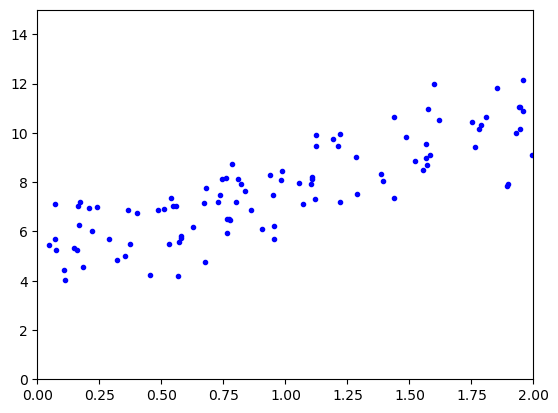

In [4]:
import matplotlib.pyplot as plt
#plt.plot(X, y, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
y_pred = lin_reg.predict(X)
rmse = mean_squared_error(y, y_pred, squared = False)
print ('Root Means Square Error = ', rmse)

Root Means Square Error =  1.067312066822313


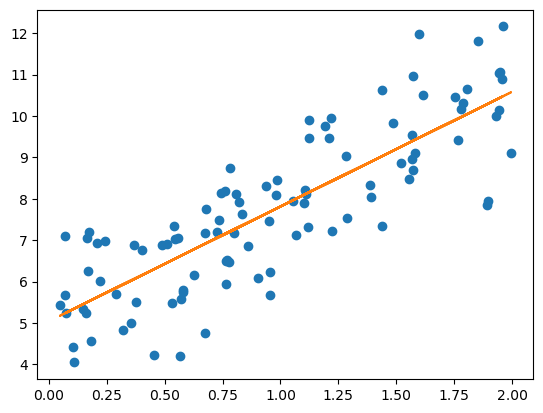

In [6]:
import matplotlib.pyplot as plt
#create basic scatterplot
plt.plot(X, y, 'o')
# X = X.flatten()

# obtain m (slope) and b(intercept) of linear regression line
# m, b =  np.polyfit(X, y, 1)
b, m = lin_reg.intercept_, lin_reg.coef_
# add linear regression line to scatterplot 
plt.plot(X, m*X+b)

In [7]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import SGDRegressor
import numpy as np
SGD_reg = SGDRegressor(penalty ='l1', learning_rate = 'optimal', alpha  = 0.01)
SGD_reg.fit(X, y)
SGD_reg.coef_
SGD_reg.intercept_
y_pred = SGD_reg.predict(X)
rmse = mean_squared_error(y, y_pred, squared = False)
print ('Root Means Square Error = ', rmse)

Root Means Square Error =  1.1043205915763235


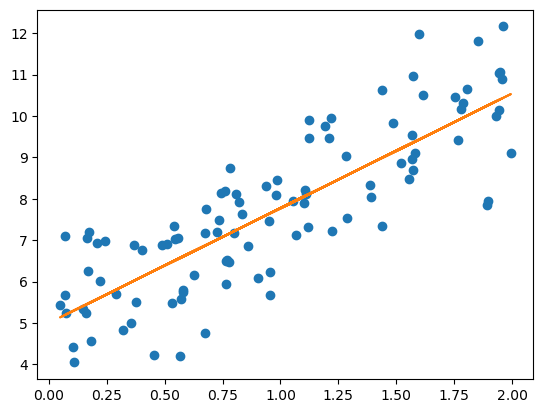

In [8]:
import matplotlib.pyplot as plt
#create basic scatterplot
plt.plot(X, y, 'o')
# X = X.flatten()

# obtain m (slope) and b(intercept) of linear regression line
# m, b =  np.polyfit(X, y, 1)
b, m = SGD_reg.intercept_, lin_reg.coef_
# add linear regression line to scatterplot 
plt.plot(X, m*X+b)

In [40]:
#BikeSharing - Start
import warnings
warnings.filterwarnings('ignore')

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [136]:
print(bike.head(5))
print(bike.shape)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
(731, 16)


In [43]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [53]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(731, 16)

In [52]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [54]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [55]:
bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [90]:
# one-hot
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            731 non-null    int64  
 1   holiday       731 non-null    int64  
 2   workingday    731 non-null    int64  
 3   temp          731 non-null    float64
 4   atemp         731 non-null    float64
 5   hum           731 non-null    float64
 6   windspeed     731 non-null    float64
 7   cnt           731 non-null    int64  
 8   season_2      731 non-null    uint8  
 9   season_3      731 non-null    uint8  
 10  season_4      731 non-null    uint8  
 11  mnth_2        731 non-null    uint8  
 12  mnth_3        731 non-null    uint8  
 13  mnth_4        731 non-null    uint8  
 14  mnth_5        731 non-null    uint8  
 15  mnth_6        731 non-null    uint8  
 16  mnth_7        731 non-null    uint8  
 17  mnth_8        731 non-null    uint8  
 18  mnth_9        731 non-null    

In [57]:
bike_new.shape

(731, 30)

In [58]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [87]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
698,1,0,1,0.280870,0.298422,0.555652,0.115522,5323,0,0,...,1,0,0,0,0,1,0,0,0,0
287,0,0,0,0.506667,0.498725,0.483333,0.258083,5217,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.771667,0.703292,0.550833,0.156717,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
715,1,0,0,0.362500,0.369938,0.838750,0.100742,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.138333,0.116175,0.434167,0.361950,822,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,1,0,1,0.560833,0.538533,0.807917,0.121271,6093,0,0,...,0,0,0,1,0,0,0,0,0,0
46,0,0,1,0.318261,0.316200,0.423478,0.251791,2115,0,0,...,0,0,0,0,1,0,0,0,0,0
374,1,0,1,0.308696,0.318826,0.646522,0.187552,3598,0,0,...,0,0,0,1,0,0,0,0,0,0
366,1,1,0,0.273043,0.252304,0.381304,0.329665,1951,0,0,...,0,0,1,0,0,0,0,0,0,0


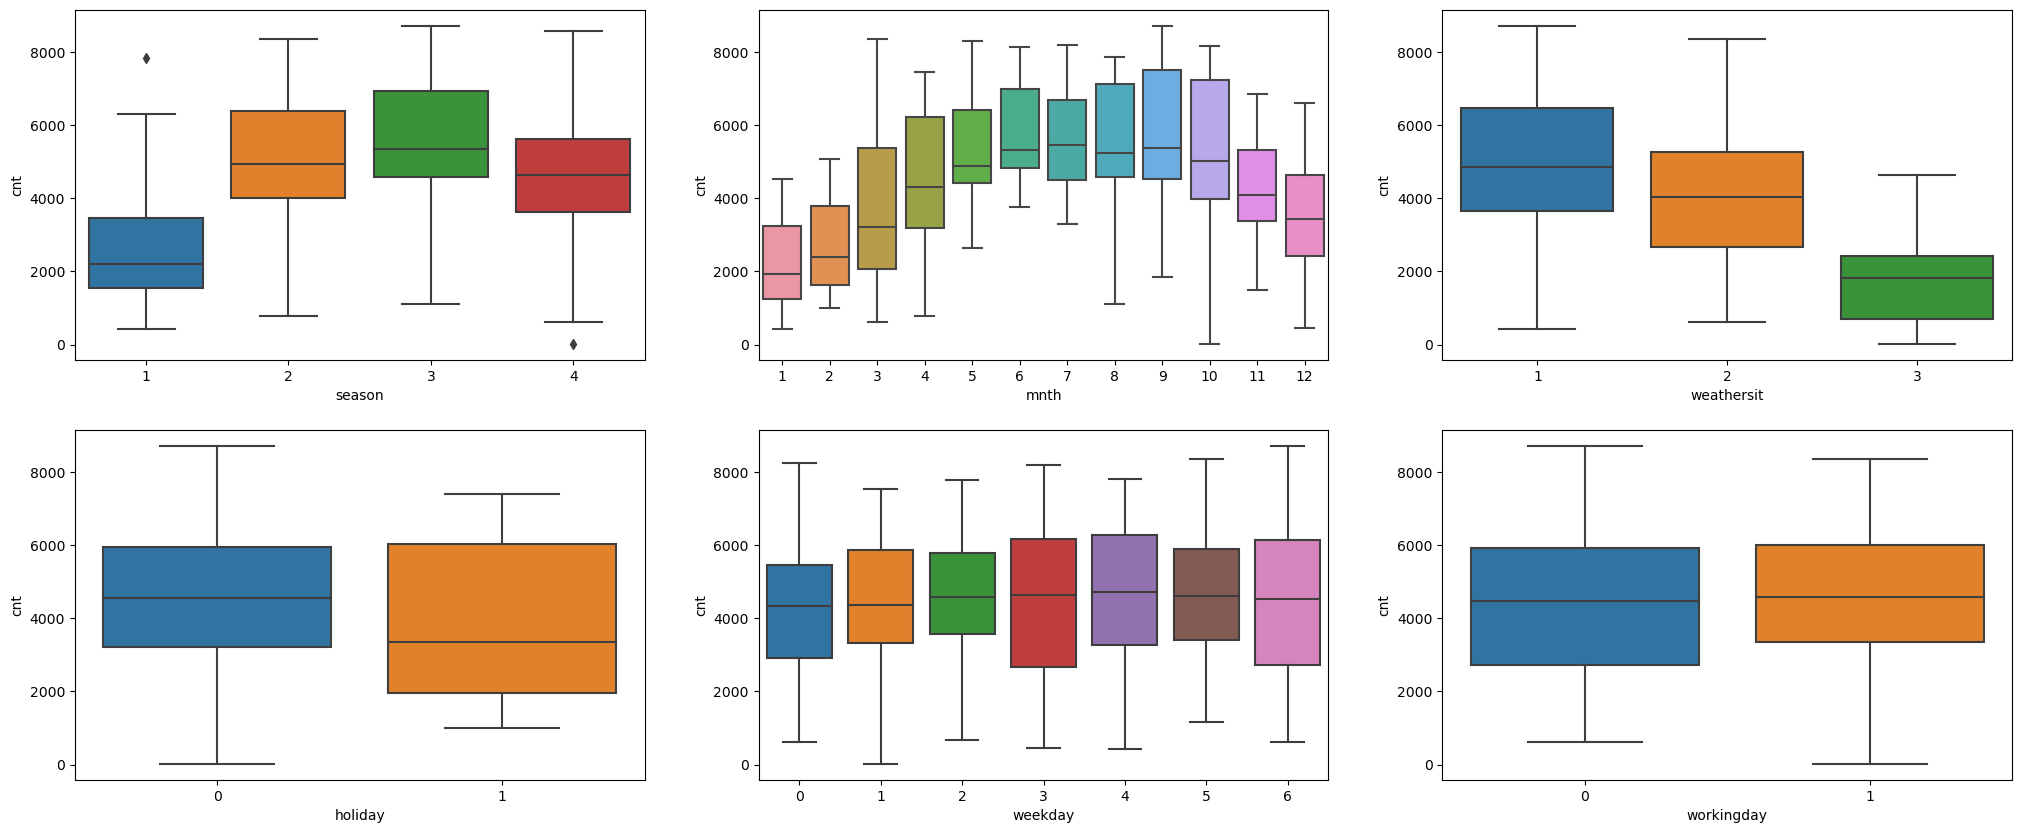

In [60]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# scaler.fit(bike_new)
# df_train.head()
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
698,1,0,1,0.276298,0.287930,0.577301,0.191993,0.609871,0,0,...,1,0,0,0,0,1,0,0,0,0
287,0,0,0,0.557653,0.550854,0.502164,0.485890,0.597676,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
715,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
bike_new[num_vars] = scaler.fit_transform(bike_new[num_vars])

In [141]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.355170,0.373517,0.828620,0.284606,0.110792,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0.379232,0.360541,0.715771,0.466215,0.089623,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,0,0,...,0,0,0,0,1,0,0,0,0,0


## Budowanie modelu regresji - Podział danych 

In [146]:
from sklearn.model_selection import train_test_split

print(df_train.shape)
print(df_test.shape)

(511, 30)
(220, 30)


In [148]:
# from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  mean_squared_error, r2_score

y_train = df_train.iloc[:,7:8]
# print (y_train.head(5))
X_train = df_train.drop(['cnt'], axis=1)
# print (X_train.head(5))
y_test = df_test.iloc[:,7:8]
X_test = df_test.drop(['cnt'], axis=1)

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# fe = RFE(lm,n_features_to_select=15)            # running RFE
# fe = rfe.fit(X_train, y_train)

y_pred = lm.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared = False))
print(r2_score(y_test, y_pred))


0.0904883580501594
0.829009137422999


In [151]:
# Regression with regulation Ridge (L2 regulation)
from sklearn.linear_model import Ridge


y_pred = ridge_model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared = False))
print(r2_score(y_test, y_pred))

0.08974572323740959
0.8318042526014044


In [152]:
# Regression with regulation Lasso (L1 regulation)
from sklearn.linear_model import Lasso, LassoCV


y_pred = lasso_model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared = False))
print(r2_score(y_test, y_pred))

0.09030676419688327
0.8296947445774332


In [153]:
# Regression with regulation Lasso (L1 regulation)
from sklearn.linear_model import ElasticNetCV


y_pred = enet_model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared = False))
print(r2_score(y_test, y_pred))

0.09027523712606747
0.8298136346443792


In [155]:
# Regression SGDRegressor
from sklearn.linear_model import SGDRegressor


y_pred = SGD_model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared = False))
print(r2_score(y_test, y_pred))

0.11011170401531663
0.7468053909409921


In [158]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVR

clf = Pipeline([
  ('feature_selection', SelectFromModel(SGDRegressor())),
  ('regression', SGDRegressor())
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared = False))
print(r2_score(y_test, y_pred))

0.1192938597594762
0.7028172012739786


In [166]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

y_pred = dt_reg.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared = False))
print(r2_score(y_test, y_pred))

0.11270906167104969
0.7347196047805313


In [171]:
# Randomforest Regressor
from sklearn.ensemble import RandomForestRegressor

y_pred = rf_reg.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared = False))
print(r2_score(y_test, y_pred))

0.07752451735156415
0.8744936701743723
